**Цель проекта**: проанализировать данные о заведениях общественного питания в Москве. На основе анализа полученных данных выявить тип заведения общественного питания, количество посадочных мест и район, в котором будет находится планируемое заведение общественного питания с роботами в качестве официантов, которые принесут планируемому заведению наибольшую популярность.

**Ссылка на облачное хранилище с презентацией**: https://docs.google.com/presentation/d/1RJ83s6C9l_GgBfB3k6meQmbRc2qDuEyOwYW3-yUE_u4/edit?usp=sharing

# 1 Предобработка данных

In [89]:
# загрузка библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
import warnings
from io import BytesIO
import requests
import numpy as np

**Общая информация о данных**

In [90]:
rest_data = pd.read_csv('C:\\Users\\User\\Downloads\\Yandex_projects\\rest_data.csv') # чтение файла с данными о ресторанам
rest_data

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [91]:
rest_data.info() # общая информация о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


**Проверка наличия пропусков**

In [92]:
print('\033[1m' + 'Количество пропусков по столбцам:' + '\033[0m')
print(rest_data.isna().sum()) # поиск пропусков в данных

Количество пропусков по столбцам:
id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64


**Проверка на наличие дубликатов и их удаление**

Чтобы выявить скрытые дубликаты, которые могли возникнуть из-за того, что одинаковые названия заведения напечатаны в разных регистрах, все строки типа object будут приведены к нижнему регистру.

In [93]:
# столбцы типа object приводятся к нижнему регистру
for i in ['object_name', 'chain', 'object_type', 'address']:
    rest_data[i] = rest_data[i].str.lower()
rest_data.head(10)

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50
5,27429,стол. при гоу сош № 1051,нет,столовая,"город москва, абрамцевская улица, дом 15, корп...",240
6,148815,брусника,да,кафе,"город москва, переулок сивцев вражек, дом 6/2",10
7,20957,буфет мтуси,нет,столовая,"город москва, авиамоторная улица, дом 8, строе...",90
8,20958,кпф семья-1,нет,столовая,"город москва, авиамоторная улица, дом 8, строе...",150
9,28858,столовая мтуси,нет,столовая,"город москва, авиамоторная улица, дом 8, строе...",120


In [94]:
unique_names = rest_data['object_name'].value_counts().reset_index()
for i in range(len(unique_names)):
    print(unique_names['index'][i], unique_names['object_name'][i])

столовая 321
кафе 278
шаурма 250
шоколадница 158
kfc 155
макдоналдс 151
бургер кинг 137
теремок 94
крошка картошка 90
домино'с пицца 90
пекарня 82
буфет 82
милти 72
суши wok 72
папа джонс 51
додо пицца 49
кофе с собой 46
школьно-базовая столовая 44
чайхона №1 43
донер кебаб 41
кафетерий 40
якитория 38
хинкальная 38
выпечка 36
кофе хаус 35
subway 34
кофейня 33
хлеб насущный 32
тануки 32
starbucks 30
прайм стар 26
иль патио 25
бистро 25
cofix 25
му-му 24
пиццерия 24
мята lounge 24
кулинария 23
бар 22
старбакс 21
донер 20
сабвей 19
андерсон 19
пицца хат 18
кафе «шоколадница» 18
кофе 16
чайхона 16
кулинарная лавка братьев караваевых 16
комбинат питания мгту им.н.э.баумана 16
алло пицца 15
вьетнамская кухня 15
азбука вкуса 15
кофемания 15
французская пекарня 15
сушишоп 15
пицца паоло 15
столовая при гбоу школа 171 15
кружка 14
чайхана 14
школа 14
стардогs 14
суши сет 13
суши вок 13
кальянная 13
штолле 13
шаурма, выпечка 13
суши 13
закусочная 13
lift 12
кафе «хинкальная» 12
каменев василий в

dim sum 2
тапчан 2
плов хаус 2
крепери де пари 2
горячий хлеб 2
гбоу школа №480 им. в.в. талалихина 2
голубка 2
coffe to go 2
one bucks coffee 2
кафе «ph&b» 2
америкэн сити пицца 2
бакинский дворик 2
гбоу школа №86 имени м.е. катукова 2
ресторан «бочка» 2
линдфорс 2
столовая 5 комбинат питания при мгу 2
duckit 2
чайникофф 2
пекарня буханка 2
школа 933 «кдп» 2
хочу шашлык 2
кофе бин 2
мандариновый гусь 2
обед буфет 2
yes pizza 2
астория 2
марков двор 2
шаурма и выпечка 2
чинар 2
кафе даблби 2
подсолнух 2
il pizzaiolo 2
среда 2
tgi fridays 2
кофикс 2
айва 2
гранд круассан 2
марракеш 2
воронеж 2
самсахана 2
пункт общественного питания без зала обслуживания посетителей 2
аврора 2
бутчер 2
крафтовое пиво 2
павлин-мавлин 2
столовая гбоу города москвы № 384 2
мари 2
пиццерия папа джонс 2
столовая шк 1468 2
школа 2001 «кдп» 2
chicken duck 2
хаят 2
нар 2
кафе «сабвей» старбакс 2
миндаль 2
купянчанка 2
дорогая, я перезвоню 2
кафе «делимарше» 2
джон донн 2
столовая при центре образования «радуга»

ресторан-бар, ночной клуб «сказка» 1
кафе «zoo парк-кафе» 1
арт-галерея 1
доноретта 1
кафе «сквознячок» 1
фишерия 1
удон сан 1
gelato bacio 1
метро к&к 1
паризьен 1
кальян клуб тайга 1
шаурма,выпечка, куры-гриль 1
пед. колледж 4 1
sushi hot 1
столовая при гоу цо № 1462 1
кафе-бар «ля-николя» 1
карагат 1
кальянная на районе 1
пекарня донер 1
столовая сош 1029 1
медицинское училище 15 1
ред брик 1
развлекательный центр «semenov» 1
столовая при гбоу школа № 2075 1
hadwok 1
ресторан калужская застава 1
столовая «цо № 1440» 1
нияма- суши бар 1
кафе юма 1
terekhov girl 1
восточный теремок 1
кафе «курассан» 1
школа 1009 1
пельменники 1
столовая школы гбоу «школа 686» 1
кафе «веста» 1
паб андердог 1
буфет школы 141 1
plpb пицца 1
моск.катрон.полиграф.комбинат 1
галактика 1
хлебникофф 1
ресторан «нар шараб» 1
суши сами 1
кафе-пекарня дк (домашняя кулинария) 1
столовая гбоу коррекционная средняя общеобразовательная школа 4 вида № 418 1
дума 1
хлебный рай 1
кафе «а-трейд» 1
ла прима маргарита 1
б

shishkin village 1
аджарули 1
spaten 1
raffle 1
гончаровъ 1
доможилов 1
лето 1
грузинский домик 1
кулинарная лавка «два кренделя» 1
донер шаурма 1
paprika picante 1
кафе при оао г-це «звездная» 1
кп мгу буфет 31 1
natura sanat 1
буфет - гбоу сош № 389 1
бак бо 1
гримм 1
столовая шк.862 1
пенная галерея 1
кофейня «старбакс кофе» 1
осетпирог 1
чешская пивная пилзнер 1
кафе «лига» 1
ширин кафе 1
хмельная келья 1
seasons 1
чап чак 1
кафе «соната» 1
столовая школа «наши традиции» 1
jj coffee 1
кислород 1
атаман 1
кальянная «riccy» 1
хот доги 1
школа № 1265 1
пиццерия il marco 1
столовая гимназии 1526 1
о, мой крафт 1
guinness steak pub 1
гудбиф 1
буфет в гбук г.москвы театра уголок дедушки дурова 1
bootleggers 1
лаборатория lounge 1
ит маркет роза 1
столовая при школе № 406 1
шаурма, шашлык 1
спб 1
кофейня «cofix» 1
не путай берега 1
бургеры и стейки 1
кафетерий «лепешки из тандыра» 1
буфет «чайная» 1
тукан 1
афродита при транспортной фирме очаково 1
фрайчикен 1
сэлтинс 1
гоу спо «строитель

ресторан «столичный вкус» 1
алтаргана 1
школа 463 «кдп» 1
столовая 1937 1
кафе альбатрос 1
столовая в школе 2045 корп.2011 (ранее школа 2038) 1
rose bar 1
столовая «кп хлебосол» 1
вегетарианское кафе вкус и цвет 1
фо-бо 1
школа 751 1
кафе «кафейня» 1
ресторан «repablic» 1
пу 33 1
чайхона «вкус востока» 1
с акцентом 1
эларджи 1
г мпи им. ипполитова-иванова 1
black star burger prime 1
столовая «гимназия № 1593» 1
бельгийский картофель 1
fusion 1
квартира № 5 1
catavina 1
банкетный зал «кристалл ballroom» 1
псарьки 1
кафе фреш салат бар 1
бодрый день кофе с собой 1
мастер кондитер 1
лапы и хвосты 1
театрально-концертный зал цдкж 1
школа № 1384 (доготовочная столовая) 1
гбоу лицей №1524 1
кафе -бар 1
кафе «дайнинг холл» 1
ланчтайм 1
столовая «педагогический институт» 1
марков двор кафе 1
кафе «венахи» 1
кофейня крендель «кофе с собой» 1
столовая гимназии 1516 1
мнтк мх глаза кафе 1
панорама 93 1
мясо.кулинария «дедовский пекарь» 1
ресторан александр 1
kafe les 1
месье круассан 1
кафе «ваби

фрайдис 1
столовая сош 1296 1
комбинат рыба и только 1
бар «терраса» 1
медицинский колледж имени клары цеткин дзр г. москвы 1
фабула 1
столовая школы 1164 1
котлет нет 1
ресторан paul 1
eateriakitchen (паста) 1
лора крафт 1
кофейня kafedra kofee 1
лапшичная lanzhou 1
пиво на разлив 1
кафе «без повода» 1
взлет 1
dolce gamarjoba 1
дача на варшавке 1
буфет при оао вниси 1
столовая при институте им. пушкина 1
кувера 1
true pho 1
скай кофе 1
доготовочная столовая - школа 1048 1
пекарня 1 1
«2 2» паб 1
ресторан эридан 1
кафе «гольф» 1
веранда 8 1
буфет зрительский при драм. театре 1
усадьба принца 1
золотая рыбка улица 1
хлеб (пекарня) 1
шардени 1
кафе «сололаки» 1
лавка мяса и вина 1
тиа 1
кафе при азс «тиса» 1
tapas avokado bar 1
при школе 404 1
cуши.пицца 1
мистер донер 24 1
sushi fix 1
гоу цо № 2006 1
академическая 1
столовая гбоу школа № 1522 имени в.и.чуркина 1
чайная 1
столовая гбоу цо № 943 «школа здоровья» 1
закусочная labobaloca 1
клево 1
старый ханой 1
принцесса шоко 1
ритм блюз к

бар«brix bar» 1
золотые ручки 1
craft & draft 1
пентхаус 1
столовая школы №709 1
школа №2073 1
кальянная дымок 1
кафе «лоранж» 1
смузи-бар «ешь фрукт» 1
ресторан «никуда не едем» , «квартира» 1
кукуруза и сок 1
кафе «гамарджоба» 1
who is who 1
столовая в бц «южный парк» 1
столовая колледжа железнодорожного и городского транспорта 1
semplice 1
метеор 1
mcdonalds 1
гуз 1
крошка-картошка 1
шаурма live 1
food store 1
о-хара 1
магазин-кулинария 1
столовая при гоу цо № 1493 1
фортуна 1
гранатовый сок 1
кафе «башлам» 1
пекарня «доноретто» 1
кофейня «чудо выпечки» 1
кафе ваби-саби 1
арт - кафе фа - минор 1
рубин 1
второе кафе 1
кафе «soul in bowl» 1
па-паэлья 1
кафк «качевник» 1
кинематограф 1
кафе «yes pizza» 1
лодка 1
чайхана тархун 1
столовая «гоу сош №1748» 1
крафт стейшн 1
швили 1
комбинат питания фин.хоз.упр.мэрии москвы 1
ред кафе 1
кафе «yummy mix salad bar» 1
ivas lounge 1
cafe giusto 1
вино и мясо 1
кондитерская здоровая индустрия 1
багратионофф 1
ресторан «счастливая щука» 1
кид рок

кафе dunkin donuts 1
деликатесы 1
столовая префектуры сао 1
шук 1
пекарня на дровах 1
кафе «олимпия» 1
булочная №10 1
гоуспо технологический колледж №28 1
vietcafe вьеткафе 1
кафе ргсу 1
центр системы питания 1
пищеблок в хоровой академии 1
buro tsum 1
ресторан «пекин» 1
акасака 1
oconnells pub 1
fried chicken 1
кафе «галерея» 1
кафе payot 1
пироги 1
папоротник 1
sky фо вьетнамская кухня 1
кебабкинг 1
kalimera 1
osteria mario+швили 1
гриль-бар «веранда» 1
кафе «сахара» 1
казан-ок 1
кафе «перовский дворик» 1
modus friends 1
кулинариум экспресс 1
столовая гбоу школа № 1985 1
чайхана дружба народов 1
dolce crema 1
кофей пицца 1
family farm burgers 1
школа 913 1
мягкие рестораны 1
кофе «кофе собой» 1
столовая шк. 125 1
nem & pho 1
столовая школы 859 1
сп «рольф» 1
брудер 1
кафе «русские традиции» 1
ресторан «шагал» 1
ресторан «бэлла паста» 1
flight club 1
бар алекс 1
pizzetta 1
hudson bar 1
столовая школы № 709 1
кафе-столовая карэль 1
автосуши 1
бар бочка 1
фабрика хлеба 1
white star loun

la mia georgia 1
бега 1
пиццерия «челентано» 1
индийская точка 1
райский дворик 1
кп мгу буфет 1
столовая цо № 1798 1
самокат-кэттеринг 1
пицца аморэ 1
столовая при школе № 920 1
столовая 16-й корпус 1
столовая дск-1 1
столовая при гоу сош № 1141 1
да еда. шаурма 1
клуб «подzемка» 1
школа n 1955 1
мару 1
хлеб да соль 1
бахча 1
вок стайл 1
ресторан «цирк на трехгорке» 1
id cafe здоровое питание 1
пиццерия «питто» 1
буфет - гбоу сош № 81 1
столовая «школа 166» 1
милленниум 1
blin.ru food&tea 1
лаунж-бар яблоко 1
старина миллер 1
ресторан «русский паб» 1
геотория 1
буфет цдкж (дом культуры железнодорожников) 1
загорье шк. 947 1
кофейня «pick up coffee» 1
mr. burgerovich 1
столовая гбоу цо № 1433 1
кафе «пицца бар» 1
lounge bar 19-90 1
тесто & сыр 1
кафест 1
столовая шк. 27 1
кафе «буркина фасоль» 1
кафе «coffee bean» 1
кафе «азербайджан» 1
бар (розливное пиво) 1
столовая фгпу усст 2 1
конак 1
столовая гбоу школа № 1532 здание 4 1
pizza mia 1
royal arbat 1
армянский переулок 1
кафе «моё ка

хинкалико 1
горячая выпечка, шашлычная 1
граци 1
школа № 149 1
донер шеф 1
pita gyros 1
пищевой колледж загорье 1
upside down cake кафе 1
кафетерий «кофе с собой» 1
выше крыши 1
адриана 1
франклин'с бургер 1
столовая 895 1
urban cafe 1
кофе баристо 1
ресторан «meat&fish» 1
кафе «ммома» 1
столовая-доготовочная при школе № 237 1
джерри вингс 1
мамина еда 1
кулинария «брецель» 1
донер горячая выпечка 1
мини-кофейня 1
кофейня «кофеман» 1
питчер паб 1
доннеретто 1
буфет-раздаточная при школе цо увк 1811«измайлово» 1
кафетерий на заправке 1
starbucks старбакс 1
филиал шбс люблино шк. 493 1
кафе скала 1
радэа 1
эфи 1
кафе «центральный дом литераторов» 1
восточная кухня кафе пекарня 1
антураж-центр 1
столовая «вниихт» 1
печь и гриль 1
мята lounge автозаводская 1
черный какаду 1
кафе «тбилисоба» 1
буфет-раздаточная «осташково» 1
пьяный краб и счастливая курица 1
вьетнэм 1
чай и кофе 1
абу гош 1
ресторан «plum» 1
пироги хаус 1
кафе- а-ля-карт 1
школа 543 гуп «школьник» 1
бифхаус 1
black & white 

бар «mr. чо» 1
ложки и вилки 1
мускат-молодежная 1
школа 763 1
белучи 1
кофейня «старбакс» 1
mulberry lounge 1
tokyo bay 1
кулинария пан пан 1
спасский 1
кухня из сезонных продуктов 1
кафе при гостинице ярославская 1
спортбар №1 1
кафе уорлд чесс рус москва 1
труффальдино 1
адмирал 1
про пельмени 1
дворик детства мирабель 1
la casa 1
столовая 355 1
гбоу школа №962 (1491) 1
кафе въетнамской кухни «фо стрит» 1
даблби кофейня 1
семейное антикафе белый кролик 1
оке поке кафе 1
кафе шашлык 1
доктор ватсон 1
буфет при школе № 1329 1
лаваш хаус 1
столичные чебуреки 1
кофе он 1
gianfranco 1
кафе лавашок 1
лицей №1581 1
закусочная «mealty» 1
буфет 29 ргау-мсха им. к.а. тимирязева 1
буфет в «бок на дубнинской» 1
сеть пекарен трдельник 1
ничего лишнего 1
кафе нэндл 1
бар крафт тайм 1
предприятие быстрого обслуживания «бенто wok» 1
кафе - столовая «маячок» 1
оксюморон 1
wake cup 1
дагестанские лави 1
столовая «спорткомплекс борисово» 1
ресторан «суши make» 1
кафе при бане 1
школа 618 1
кафе tim-ti

столовая мфк 1
бешбармак 1
кафетерий при гостинице «саяны» 1
пушкаревъ 1
пури-хачапури 1
мясорубка 1
ривер 1
столовая «гбоу школа №718» 1
комплексное предприятие 1
бар 1930 1
борго 1
арт-кафе при театре 1
золотой орех 1
столовая школа 29 1
бар «понти» 1
кофе ти 1
ресторан«макдоналдс» 1
столовая школа 1498 1
финтрейд 1
веранда 15.1 1
чак норрис крафт паб 1
тан 1
fame 1
дз пд москоу 1
буфет «апельсин» 1
ресторан buba by sumosan 1
столовая «ешка» 1
stone age 1
кафе самарканд 1
столовая фуршет.ру 1
бары 12345 1
кафетерий «плюшка&ватрушка» 1
кафе il giorno 1
столовая гбпоу скисиг 1
мясной бар №7 1
пивотека 1
фудмаркет. якубов р.я. 1
кристина 1
шашлычная курдюк 1
кп мгу буфет 88 1
сахар. кафе-ресторан 1
пельменчик 1
ресторан «боэми» 1
double pizza 1
столовая при реабилитационном центре 1
кафе «cultura coffe» 1
караоке-прожектор 1
кальянная noel lounge 1
стол. 3-го автобусного парка 1
бар «брюс» 1
фрателли 1
банкет-сервис 1
матч поинт 1
буфет «кулинария при гкнпц им. хруничева м.в» 1
зефир 1


столовая центр психолого-педагогической реабилитации и коррекции 1
осипов а.с. (прод.база «очаково») 1
кот-ч 1
новая эра 1
майя 1
кафе при гкнпц им. м.в.хруничева 1
arbat hall 1
столовая уоо цсбофнпр 1
строгинская гавань 1
кафе хайп 1
столовая школа 804 1
рамен клаб японская лапшичная 1
столовая-доготовочная при школе 1137 1
царицынский мясокомбинат 1
кафе песто и митлес 1
столовая школы № 1223 1
фабрика пицца 1
честная кухня 1
столовая при маоу нш 1
шоколадница кофемания 1
арчи 1
колледж № 29 1
винный буфет 1
буфет «согдиана» 1
кафе-пекарея «волконский» 1
точка кипения 1
при школе 386 1
столовая школа 84 1
школа 613 1
фитнес бар холдинг 1
кафе при бассейне 1
хлеб & мясо 1
кафе-бар «хижина» 1
консис + 1
кафе «m-city» 1
мосводоканал 1
massala house 1
улыбка 1
ресторан «винтаж» 1
офицерское 1
il massimo 1
м арс 1
кафе «кальянная weston lounge club» 1
ветераны фалафеля 1
менора 1
ресторан «дюжина» 1
кафе 12 1
паб zolden (закрыто на ремонт в 2018 году) 1
вай нот 1
ресторан «империя» 1
инте

la provincia 1
закусочная «колобок» 1
кафе «у толика» 1
бар «пивной погребок» 1
amande cafe 1
шаурма. гриль 1
школа №1272 1
дом чуду 1
кулинари 1
косой маркс 1
комбинат питания 1
самналей 1
тд гум «фестивальное» азия 1
ресторан «тандыр» 1
shefs 1
клаб гриль 1
кафетерий ab dali 1
omgcoffee 1
тд гум кафе «фестивальное» картофель 1
азия 1
столовая гбоу гимназия № 1552 1
гбпоу «педагогический колледж «10») 1
peshi 1
столовая школа 537 «комбинат дошкольного питания» 1
кафе бульвар 1
пиворыба 1
ресторан «dream city» 1
brioche 1
столовая при шк. n758 1
кафе «икта» 1
icon 1
мнтк мх глаза пищеблок 1
систерс 1
донер-хаус 1
кафе техас-чикен 1
flames lounge 1
клуб аврора 1
семь летучих рыб 1
вок-стрип 1
кафе «авто суши» 1
крюково-цсо взрослое отделение 1
кафе концертной студии фгуп ттц «останкино» 1
кухня народов 1
sio столовая 1
спорт-бар «фортуна» 1
гбоу «школа № 479 им. дважды героя советского союза маршала в.и. чуйкова 1
meet meat 1
калина бар 1
кафе треугольник 1
кафе луч 1
ресторан xiv 1
каф

зоар кафе 1
coffeeshop 1
синдбад 1
шеф 1
хинкальный дом 1
все твои друзья 1
khinkalnaya 1
ресторан «carne» 1
ресторан «премьер-спорт» 1
выпечка ручной работы 1
остерия марио 1
collider 1
халяль узбекская кухня 1
охотник 1
старая усадьба 1
кафе при салоне красоты dessange 1
гандзак 1
ресторан «винный рынок» 1
предприятие быстрого питания «экодом» 1
вьетнамская кухня pho viet 1
столовая «cafetera» 1
буфет школы 1283 1
столовая «леметр фск» 1
бизнес-школа аип 1
шафран 1
za gorami 1
бар варвар 1
ла специя италия 1
кафе «бонархитект» 1
столовая «мпо металлист» 1
столовая «го сош № 63» 1
мнтк мх глаза буфет 3 1
ресторан «раковарня» 1
атлас 1
столовая «цо «чертаново» спорт-школа» 1
столовая при шк. n960 1
marrakesh хинкальная 1
бар the kisa bar 1
школа 940 гуп «школьник» 1
деливери пицца 1
фудмаркет. аргашокова о.в. 1
кафе «delonix» 1
васаби 1
птл 306 продцентр геркулес 1
столовая на базе гбоу школа № 2083. до «сказка» 1
genso 1
сосны 1
луар 1
shell, yes 1
pie factore 1
суши маркет суши град 

zafferano, эдоко, forte bello 1
кафе marshe 1
бруно 1
sushiyai 1
кафе мангал 1
кафе штолле 1
малаев 1
cobra game house 1
таксо пицца 1
кафе «кофейня старбакс» 1
проект 6-2 1
тандырница 1
кафишка 1
колобок 1
волга 1
ресторан купец 1
кафе рай 1
зелёный лис 1
грузинская кухня меама 1
буфет «раздаточная при автостанции -филиал 5 автобусного парка гуп мосгортранс» 1
штос 1
ресторан «макото» 1
гудман гудвин 1
аморино 1
твое кафе 1
кофебум 1
столовая1359 1
ёбидоёби 1
арт-кальянная shishasity 1
дгуп филевский атп гк мосгортранс 1
хлеб и co 1
лайт кафе 1
доготовочная столовая - школа 1924 1
паб злачное место 1
sushi club пицца суши 1
пекарня домашний хлеб 1
столовая шк.1036 1
i-chef 1
froyolla 1
советские времена чебуречная ссср 1
веранда 1 1
maison declair 1
булочная № 5 1
шах-даг 1
кафе «кофе пью и читаю» 1
столовая при гоу цо 491 1
кафе генеральной дирекции 1
миксер 1
столовая при шк. 276 1
гбоу коллежд связи 54 1
jpan bistro 1
кафе «пекинская утка» 1
бургер шеф 1
кальянная «лофт» 1
чайхона 

школа 733 1
gocoffe 1
бильярдное кафе 1
кафе островок суши 1
буфет театра «et cetera» 1
балканский ресторан джумбус 1
гбоу школа № 626 (гбоу сош № 568) 1
ресторан «клюква» 1
печки-лавочки 1
шурпа 1
лаваш-центр 1
столовая (университет им. косыгина) 1
ресторан «хеппиэнд» 1
веранда 3.1 1
кафе-пекарня levin bakehous 1
мустафа кебаб 1
аль посто 1
дши 11 1
мангал хаус 1
беллиссима 1
суши шоп пицца шоп 1
столовая генштаба 1
ресторан «прай тайм» 1
паб delirium tremens 1
bistrof & boutigue №7 1
кофейня «цурикат» 1
кафе при гостинице «рослеспром» 1
бегемот 1
веранда 17 1
буфет «мцби» 1
столовая «школа 639» 1
жингялов хац гирос бургер 1
мпк «крекер» 1
буфет «фуд - лайн» 1
клледж № 28 1
буфет метро 1
фудмастер 1
вкусно 1
гп фуфс рф 1
тап и баррель паб 1
кафе «sml deli coffee shop» 1
coffee good 1
кафе ферганское 1
секретное место 1
casa di moska 1
ресторан ( закрытая) 1
кампус кафе-бар 1
sushi by jimmy 1
hardy lounge bar 1
ku рамен изакая бар 1
бар лобби гостиницы балчуг 1
кафе camera obscura 1
ел

Также в столбце 'object_name' были замечены названия одних и тех же заведений, которые встречаются и на русском, и на английском языках (например, 'subway' и 'сабвей'). Такие названия также являются скрытыми дубликатами, и они все будут приведены к более распространенному варианту названия. 

In [95]:
names_to_change = ['старбакс', 'starbucks кофе' , 'старбакс starbucks', 'иль патио', 'иль-патио', 'tutti frutti frozen yogurt', 'сабвей', 'суши вок', 'maki maki', 'ростикс kfc', 'upsidedowncake', 'синнабон', 'tgi fridays', 'кофехаус', 'goodman', 'goodman гудман', 'прайм стар', 'prime прайм стар', 'лаунж', 'кофе порт', 'гудман гудман', 'гудмангудман', 'теремок инвест', 'теремокинвест', 'данкин донатс', 'прайм', 'праймкафе', 'prime primestar', 'мята', 'мята lounge lounge', 'кальянмята lounge', 'бургер кинг burger king', 'burger king']
change_to = ['starbucks', 'starbucks', 'starbucks', 'il patio', 'il patio', 'tutti frutti', 'subway', 'суши wok', 'маки маки', 'kfc', 'upside down cake', 'cinnabon', 'fridays', 'кофе хаус', 'гудман', 'гудман', 'prime star', 'prime star', 'lounge', 'кофепорт', 'гудман', 'гудман', 'теремок', 'теремок', 'dunkin donuts', 'prime star', 'prime star', 'prime star', 'мята lounge', 'мята lounge', 'мята lounge', 'бургер кинг', 'бургер кинг']
for i in range(0, len(names_to_change)):
    rest_data['object_name'] = rest_data['object_name'].replace(names_to_change[i], change_to[i], regex=True)

В списке уникальных значений столбца 'object_name' присутствуют такие слова как 'ресторан' и 'кафе', которые могут приводить к появлению скрытых дубликатов (например, 'кафе «академия»' и 'академия' будет являться скрытым дубликатом), поэтому подобные слова, описывающие тип заведения будут удалены из названий заведений. Также из названий заведений будут удалены кавычки и тире, так как эти символы, также могут формировать скрытые дубликаты.

In [96]:
name_type = ['кафе ', 'кофейня ', ' кафе', ' кофейня', 'кафейня ', 'ресторан ', 'кальянная ', 'кальян ', 'кальян', 'кулинарная лавка ', 'закусочная ', 'пбо ', 'готовые блюда', 'пироги ', 'пироговая ', ' кафе', 'кондитерская ', 'кондитерская', 'пекарня ', 'кондитерская-пекарня ', 'бар ', 'кальян-бар ', 'кальянбар ', 'предприятие быстрого обслуживания ', 'магазин готовой еды ', 'пиццерия ', 'пицерия ', 'инвест', ' инвест', 'стейк хаус ']
for name in name_type:
    rest_data['object_name'] = rest_data['object_name'].replace(name, '', regex=True)
rest_data.head(10)

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,«академия»,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,«вишневая метель»,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50
5,27429,стол. при гоу сош № 1051,нет,столовая,"город москва, абрамцевская улица, дом 15, корп...",240
6,148815,брусника,да,кафе,"город москва, переулок сивцев вражек, дом 6/2",10
7,20957,буфет мтуси,нет,столовая,"город москва, авиамоторная улица, дом 8, строе...",90
8,20958,кпф семья-1,нет,столовая,"город москва, авиамоторная улица, дом 8, строе...",150
9,28858,столовая мтуси,нет,столовая,"город москва, авиамоторная улица, дом 8, строе...",120


In [97]:
# удаление знаков препинания из названия
preps = ['«', '»', '-']
for prep in preps:
    rest_data['object_name'] = rest_data['object_name'].replace(prep, '', regex=True)
rest_data.head(10)

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,24309,академия,нет,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
4,119365,вишневая метель,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50
5,27429,стол. при гоу сош № 1051,нет,столовая,"город москва, абрамцевская улица, дом 15, корп...",240
6,148815,брусника,да,кафе,"город москва, переулок сивцев вражек, дом 6/2",10
7,20957,буфет мтуси,нет,столовая,"город москва, авиамоторная улица, дом 8, строе...",90
8,20958,кпф семья1,нет,столовая,"город москва, авиамоторная улица, дом 8, строе...",150
9,28858,столовая мтуси,нет,столовая,"город москва, авиамоторная улица, дом 8, строе...",120


In [98]:
print('\033[1m' + 'Количество дубликатов:' + '\033[0m')
duplicates = rest_data.duplicated(subset=['object_name', 'address', 'chain', 'object_type']).sum()
print(duplicates) # поиск дубликатов
print('\033[1m' + 'Процент дубликатов от общего числа значений:' + '\033[0m')
print(round(duplicates/len(rest_data), 3) * 100, '%')

Количество дубликатов:
193
Процент дубликатов от общего числа значений:
1.3 %


Так как дубликаты составляют всего чуть более 1% от общего числа значений, то их можно удалить.

In [99]:
# удаление дубликатов из rest_data, при этом в датафрейме сохраняется первое вхождение дубликата
rest_data = rest_data.drop_duplicates(subset=['object_name', 'address', 'chain', 'object_type'], keep='first')

**Определение наличия ошибок в разделении заведений на сетевые и несетевые**

Далее будет проверено, если ли заведения, которые попали одновременно и в группу сетевых, и в группу несетевых.

In [100]:
# поиск заведений, которые попали и в сетевую, и в несетевую группу
list_chain = rest_data.query('chain == "да"')['object_name'].to_list() # названия сетевых заведений
list_not_chain = rest_data.query('chain == "нет"')['object_name'].to_list() # названия несетевых заведений
both = [] # список, с названиями, которые попали в обе категории
for i in list_chain: # для каждого элемента в списке с названиями сетевых заведений
    if i in list_not_chain and i not in both: # проверить, есть ли он в списке несетевых заведений
        both.append(i) # если есть, то добавить в список list_both
print('\033[1m' + 'Заведения, которые отмечены как сетевые и как несетевые' + '\033[0m')
print(both)
print('\033[1m' + 'Количество заведений, которые попали в обе группы' + '\033[0m')
print(len(both))

Заведения, которые отмечены как сетевые и как несетевые
['брусника', 'алло пицца', 'хлеб насущный', 'dunkin donuts', 'вареничная №1', 'шоколадница', 'теремок', 'хинкальная', 'кружка', 'виктория', 'академия', 'панчо пицца', 'kfc', 'subway', 'якитория', 'сити пицца', 'prime star', 'магнолия', 'кофе с собой', 'волконский', 'бургер кинг', 'папа джонс', 'две палочки', 'вабисаби', 'штолле', 'темпл бар', 'гудман', 'il patio', 'мюнгер', 'сити', 'азбука вкуса', 'мимино', 'кофепорт', 'travelers coffee', 'рецептор', 'сушишоп', 'мята lounge', 'upside down cake', 'тапчан', 'колбасофф', 'венеция', 'руккола', 'роллофф', 'урюк', 'чешская пивная козловица', 'пицца паоло', 'гурман', 'квартира 44', 'суп', 'марукамэ', 'спб', 'воккер', 'кофе', 'при азс', 'япоша', 'барбарис', 'bocconcino', 'ян примус', 'tutti frutti', 'healthy food', 'обжорный ряд', 'при азс газпромнефть', 'бургер клаб', 'correas', 'молли гвинз', 'cofix', 'fridays', 'сказка', 'вкусняшка', 'boobo', 'лукойл', 'osteria mario', ' милти']
Количе

Заведения из списка выше в одних строках датафрейма были отмечены как сетевые, в других - как несетевые. Так как, вероятнее всего, заведение не может являться и сетевым, и несетевым одновременно, то для названий рестораны из вышеприведенного списка значение столбца 'chain' будет изменено на 'да'.

In [101]:
warnings.filterwarnings("ignore")
for i in both: # для названия ресторана, который попал и в сетевые, и в несетевые
    rest_data.loc[rest_data['object_name'] == i, 'chain'] = 'да' # для этого ресторана изменить значение столбца 'chain' на 'да'

Типы данных в столбцах не были изменены. 

В данных не было обнаружено пропусков, но были обнаружены дубликаты. 

Значения столбцов типа object были переведены в нижний регистр для поиска дубликатов. При проверке данных на наличие дубликатов из проверки был исключен столбец 'id', так как строки могут полностью совпадать по адресу и названию кафе, но при этом иметь разные id. Также для проверки на наличие скрытых дубликатов из ячеек с названиями заведений были исключены слова 'кафе', 'пиццерия', 'кофейня', 'антикафе', 'кафейня', 'антикафе', 'столовая', 'ресторан', 'бар', а также кавычки и тире. В данных были обнаружены неявные дубликаты в названиях кафе. Например, кафе Starbucks могло быть обозначено и как "Starbucks", и как "Старбакс". В таких случаях названия кафе были приведены к наиболее распространенному варианту наименования.

Были обнаружены заведения с одинаковым названием, попавшие и в группу сетевых, и в группу несетевых. Для таких заведений значение столбца 'chain', отражающего то, является ли заведение сетевым, было заменено на "да" для всех заведений сети.

# 2 Анализ данных

### Соотношение видов объектов общественного питания по количеству

In [102]:
# формирование таблицы с указанием количества обЪектов общественного питания в зависимости от типа объекта
# также было расчитано, какой процент составляет количество объектов каждого типа от общего числа объектов
types_count = rest_data.pivot_table(index='object_type', values='id', aggfunc='count')\
        .reset_index()\
        .sort_values(by='id', ascending=False)\
        .rename(columns={'id':'quantity'})
types_count['percent'] = (round(types_count['quantity']/len(rest_data) * 100, 1)).astype(str) + ' %'
types_count

,object_type,quantity,percent
3,кафе,6004,39.6 %
8,столовая,2575,17.0 %
7,ресторан,2270,15.0 %
6,предприятие быстрого обслуживания,1890,12.5 %
0,бар,852,5.6 %
1,буфет,570,3.8 %
4,кафетерий,393,2.6 %
2,закусочная,347,2.3 %
5,магазин (отдел кулинарии),272,1.8 %


In [103]:
# построение линейнатой диаграммы, показывающей количество объектов общественного питания по типам объектов
fig = px.bar(types_count, x='quantity', y='object_type', text='percent', orientation='h', color='object_type')
# название диаграммы и подписи осей
fig.update_layout(
    title='Соотношение видов объектов общественного питания по количеству',
    xaxis_title='Количество ',
    yaxis_title='Тип заведения общественного питания'
)
# положение легенды диаграммы
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.47,
    xanchor="right",
    x=0.99
))
# настройка легенды диаграммы - для каждого типа объекта общественного питания
# будет указан тип объекта общественного питания
for trace, percent in zip(fig.data, types_count['percent']) :
    trace.name = trace.name.split('=')[1]
fig.update_traces(textposition='inside')
fig.show()

Наибольшее количество заведений наблюдается в категории "кафе" (почти 40%). Также в топ-3 типов заведений входят столовые и рестораны, которые составляют 17% и 15% соответственно. Наименьшее количество заведений наблюдается в категории "кафетерий", "закусочная" и "магазин (отдел кулинарии)", составляя 2.6%, 2.4% и 1.8% от общего числа заведений соответственно.

###  Cоотношение сетевых и несетевых заведений по количеству

In [104]:
# таблица, где будет расчитано количество объектов питания сетевого и несетевого типа,
# а также то, какой процент объекты каждого типа составляют от общего числа
chains = rest_data.groupby('chain')['id'].agg('nunique')\
                .reset_index()\
                .sort_values(by='id', ascending=False)\
                .rename(columns={'id':'quantity'})
chains['percent'] = round(chains['quantity']/len(rest_data['id'].unique()) * 100, 1).astype(str) + ' %'
chains

,chain,quantity,percent
1,нет,12046,79.4 %
0,да,3127,20.6 %


In [105]:
# круговая диаграмма соотношения сетевых и несетевых заведений по количеству
labels = ['Несетевые', 'Сетевые']
fig = go.Figure(data=go.Pie(labels=labels, values=chains['quantity']))
fig.update_layout(title='Соотношение сетевых и несетевых ресторанов по количеству')
fig.show()

Большинство заведений являются несетевыми. В то время как число несетевых заведений составляет около 79 % (12046), число сетевых составляет около 21 % (3127), то есть сетевых заведений примерно в 4 раз меньше, чем несетевых.

### Определение вида объекта общественного питания, для которого характерно сетевое распространение

In [106]:
# таблица с типами сетевых заведений и количеством заведений в зависимости от их типа
object_chain = rest_data.query('chain == "да"')\
                      .groupby('object_type')['id']\
                      .agg('count')\
                      .reset_index()\
                      .sort_values(by='id',ascending=False)\
                      .rename(columns={'id':'quantity'})
# общее число заведений
sum_quantities = object_chain['quantity'].sum()
# расчет процента, который составляет количество объектов каждого типа от общего числа сетевых заведений
object_chain['percent'] = round(object_chain['quantity']/sum_quantities * 100, 2).astype(str) + ' %'
object_chain

,object_type,quantity,percent
3,кафе,1498,47.91 %
6,предприятие быстрого обслуживания,798,25.52 %
7,ресторан,570,18.23 %
5,магазин (отдел кулинарии),79,2.53 %
4,кафетерий,60,1.92 %
2,закусочная,58,1.85 %
0,бар,47,1.5 %
1,буфет,13,0.42 %
8,столовая,4,0.13 %


In [107]:
# линейчая диаграмма, показывающая количества заведений каждого типа и какой процент они составляют от
# общего числа сетевых заведений
fig = px.bar(object_chain, x='quantity', y='object_type', text='percent', orientation='h', color='object_type')
fig.update_layout(
    title='Количество заведений в зависимости от типа сетевого заведения',
    xaxis_title='Количество заведений',
    yaxis_title='Тип сетевого заведения'
)
fig.update_layout(legend=dict(
        yanchor='top',
        y=0.60,
        xanchor="right",
        x=0.99
    )
                 )
for trace, percent in zip(fig.data, object_chain['percent']):
    trace.name = trace.name.split('=')[1]
fig.show()

Как видно на диаграмме, большинство сетевых заведений входят в категорию "кафе" (почти 48% от всех сетевых заведений), "предприятие быстрого обслуживания" (около 25% от всех сетевых заведений) и "ресторан" (около 18% от всех сетевых заведений). В общей сумме заведения данных типов составляют примерно 91% от всех сетевых заведений. Оставшиеся 9% сетевых заведений входят в категории "магазин (отдел кулинарии)", "кафетерий", "закусочная", "бар", "буфет" и "столовая". Наиболее редко сетевыми являются буфеты и столовые. Каждая из этих категорий поставляет по отдельности менее 0.5% от общего числа сетевых заведений. 

In [108]:
# таблица с количеством заведений в зависимости от типа объекта общественного питания
percent_chains = rest_data.groupby(['object_type'])['id']\
                          .agg('count')\
                          .reset_index()\
                          .rename(columns={'id':'Всего заведений', 'object_type':'Тип объекта'})
# таблица с количеством сетевых заведений по типу объекта общественного питания
chains = rest_data.query('chain=="да"').groupby(['object_type'])['id']\
                  .agg('count')\
                  .reset_index()\
                  .rename(columns={'id':'Число сетевых заведений', 'object_type':'Тип объекта'})
# объединеие таблиц с общих количеством заведений по типам и с количеством сетевых заведений по типам
percent_chains = percent_chains.merge(chains, on='Тип объекта', how = 'left')
# расчет процента сетевых заведений от всех заведений в категории объектов общественного питания
percent_chains['Процент сетевых заведений'] = round(percent_chains['Число сетевых заведений']/percent_chains['Всего заведений'] * 100, 2)
# сортировка таблицы по убыванию процента сетевых заведений
percent_chains = percent_chains.sort_values(by='Процент сетевых заведений', ascending=False)
# перевод значений столбца с процентом сетевых заведений в строковый тип и добавление знака ' %'
percent_chains['Процент сетевых заведений'] = percent_chains['Процент сетевых заведений'].astype(str) + ' %'
percent_chains

,Тип объекта,Всего заведений,Число сетевых заведений,Процент сетевых заведений
6,предприятие быстрого обслуживания,1890,798,42.22 %
5,магазин (отдел кулинарии),272,79,29.04 %
7,ресторан,2270,570,25.11 %
3,кафе,6004,1498,24.95 %
2,закусочная,347,58,16.71 %
4,кафетерий,393,60,15.27 %
0,бар,852,47,5.52 %
1,буфет,570,13,2.28 %
8,столовая,2575,4,0.16 %


In [109]:
# линейчатая диаграмма процента сетевых заведений в зависимости по типа объекта общественного питания
fig = px.bar(percent_chains, x='Процент сетевых заведений', y='Тип объекта', text='Процент сетевых заведений', orientation='h', color='Тип объекта')
fig.update_layout(
    title='Процент сетевых заведений в зависимости от типа объекта общественного питания',
    xaxis_title='Процент сетевых заведений',
    yaxis_title='Тип сетевого заведения'
)
fig.update_layout(legend=dict(
        yanchor='top',
        y=0.40,
        xanchor="right",
        x=0.99
    )
                 )
for trace, percent in zip(fig.data, object_chain['percent']):
    trace.name = trace.name.split('=')[1].strip()
fig.show()

Наибольший процент сетевых заведений отмечается в категории "предприятие быстрого обслуживания" (42% предприятий быстрого обслуживания являются сетевыми) и "магазин(отдел кулинарии)" (29%). Третье место по сетевых заведений делят между собой рестораны и кафе (примерно по 25% заведений в этих категориях яляются сетевыми). Наименее редко сетевыми являются столовые: менее 0.2% столовых являются сетевыми.

### Количество посадочных мест и число заведений для сетевых заведений

In [110]:
chains = rest_data.query('chain == "да"') # датафрейм, в котором содержатся только сетевые заведения
chains.head()

,id,object_name,chain,object_type,address,number
2,24309,академия,да,кафе,"город москва, абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
6,148815,брусника,да,кафе,"город москва, переулок сивцев вражек, дом 6/2",10
13,22579,алло пицца,да,кафе,"город москва, улица авиаторов, дом 14",32
16,144107,суши wok,да,предприятие быстрого обслуживания,"город москва, азовская улица, дом 3",7


In [111]:
# посчет количества заведений и медианного количества сидячих мест для сетевых заведений
chains_groups = chains.groupby('object_name')[['id', 'number']]\
                      .agg({'id':'count', 'number':'median'})\
                      .sort_values(by='id', ascending=False)\
                      .rename(columns={'id':'quantity', 'number':'seats'})\
                      .reset_index()\
                      .query('quantity > 1')
# округление среднего числа посадочных мест до одного знака после запятой
chains_groups['seats'] = round(chains_groups['seats'], 1)
chains_groups.head(10)

,object_name,quantity,seats
0,kfc,183,50.0
1,шоколадница,181,50.0
2,макдоналдс,167,79.0
3,бургер кинг,159,45.0
4,теремок,114,24.5
5,домино'с пицца,98,16.0
6,крошка картошка,94,15.0
7,суши wok,89,6.0
8,милти,78,0.0
9,папа джонс,67,20.0


In [112]:
print('\033[1m' + 'Медианное количество заведений в рамках одной сети:' + '\033[0m')
print(round(chains_groups['quantity'].median()))
print('\033[1m' + '95-й перцентиль количества заведений в рамках одной сети:' + '\033[0m')
print(round(np.percentile(chains_groups['quantity'], 95)))
print()
print('\033[1m' + 'Медианное количество посадочных мест в сетевых заведениях:' + '\033[0m')
print(round(chains['number'].median()))
print('\033[1m' + '95-й перцентиль количества посадочных мест в сетевых заведениях:' + '\033[0m')
print(round(np.percentile(chains['number'], 95)))

Медианное количество заведений в рамках одной сети:
5
95-й перцентиль количества заведений в рамках одной сети:
60

Медианное количество посадочных мест в сетевых заведениях:
40
95-й перцентиль количества посадочных мест в сетевых заведениях:
153


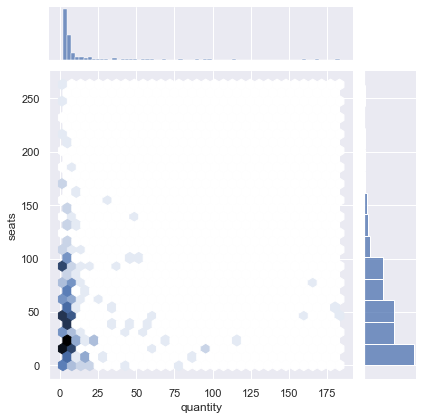

In [113]:
# визуализация распределения количества заведений и числа посадочных мест для сетевых заведений
sns.jointplot(x='quantity', y='seats', data=chains_groups, kind='hex')

Медианное количество заведений в рамках одной сети равно 5. 95% заведений имеют не более 60 филиалов. На диаграмме рассеивания также видно, что абсолютное большинство заведений имеют не более 50 филиалов. 

Медианное количество посадочных мест в заведении равно 40. 95% заведений имеют не более 153 филиалов. На диаграмме рассеивания также видно, что большинство заведений имеют не более 150 посадочных мест.

На основе полученных данных можно судить о том, что для сетевых заведений характерно небольшое количество филиалов с большим количеством посадочных мест.

### Среднее количество посадочных мест в зависимости от вида объекта общественного питания

In [114]:
# таблица, в которой для каждого видо объекта общественного питания рассчитано среднее число посадочных мест
type_seats = rest_data.groupby('object_type')['number']\
                         .agg(['mean', 'median'])\
                         .reset_index()\
                         .sort_values(by=['mean', 'median'], ascending=False)\
                         .rename(columns={'mean':'seats_mean', 'median':'seats_median'})
# округление среднего и медианного числа посадочных мест до целого числа
type_seats['seats_mean'] = (type_seats['seats_mean']).astype(int)
type_seats['seats_median'] = (type_seats['seats_median']).astype(int)
type_seats

,object_type,seats_mean,seats_median
8,столовая,130,103
7,ресторан,97,80
1,буфет,51,32
0,бар,43,35
3,кафе,39,32
6,предприятие быстрого обслуживания,20,6
4,кафетерий,9,6
2,закусочная,7,0
5,магазин (отдел кулинарии),5,0


В таблице выше видно, что среднее и медианное число посадочных мест для заведениий достаточно сильно отличается. Это скорее всего связано с выбросами количества мест (то есть в данных присутствуют заведения с нетипично большим числом посадочных мест для данного типа заведения). Сперва будет построена линейчатая диаграмма медианного количества посадочных мест от типа заведения, завтра будет простроен violin plot, чтобы оценить, насколько данные разбросаны.

Text(0.5, 1.0, 'Среднее количество посадочных мест в зависимости от типа заведения')

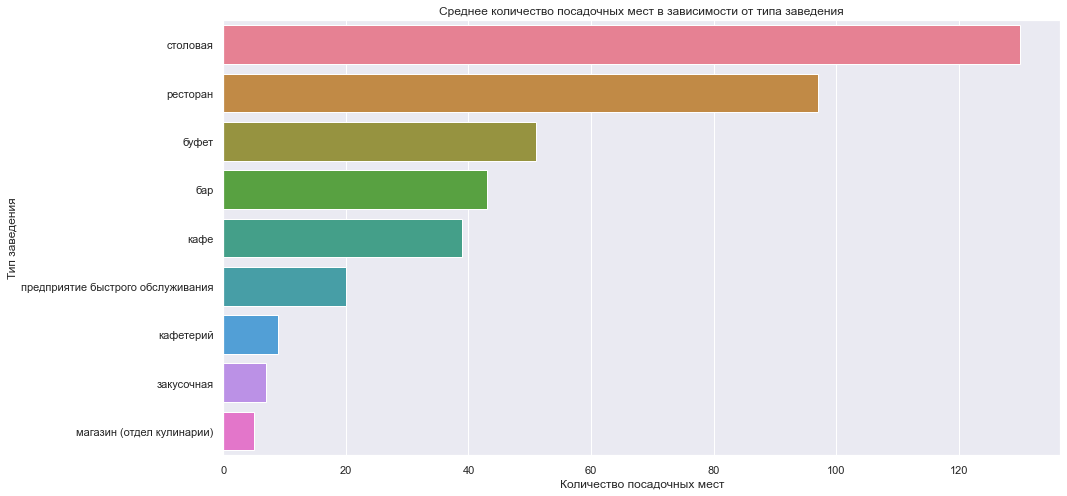

In [115]:
# линейчатая диаграмма среднего количества посадочных мест в зависимости от типа заведения
sns.barplot(x=type_seats['seats_mean'], y=type_seats['object_type'], palette='husl')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Тип заведения')
plt.title('Среднее количество посадочных мест в зависимости от типа заведения')

Text(0.5, 1.0, 'Медианное количество посадочных мест в зависимости от типа заведения')

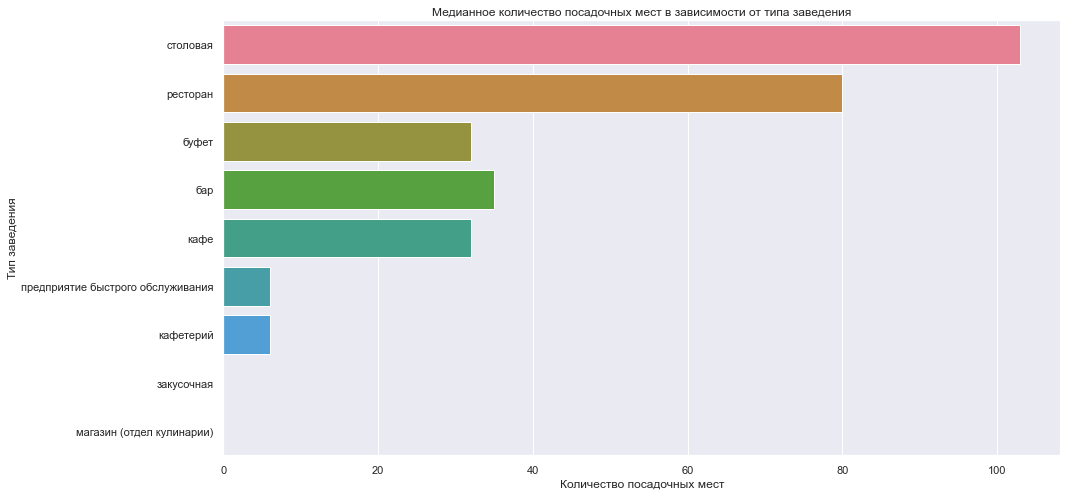

In [116]:
# линейчатая диаграмма медианного количества посадочных мест в зависимости от типа заведения
sns.barplot(x=type_seats['seats_median'], y=type_seats['object_type'], palette='husl')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Тип заведения')
plt.title('Медианное количество посадочных мест в зависимости от типа заведения')

Наибольшее среднее количество посадочных мест отмечено у столовых (в среднем 128 посадочных мест и 103 посадочных места по медиане) и ресторанов (в среднем 97 посадочных мест и 80 посадочных мест по медиане), наименьшее - кафетериев, закусочных и отделов кулинарии в магазинах (в среднем 9, 7 и 5 посадочных мест и по медиане - 6, 0 и 0, соответсвенно). 

Text(0.5, 1.0, 'Распределение количества посадочных мест в зависимости от типа заведения')

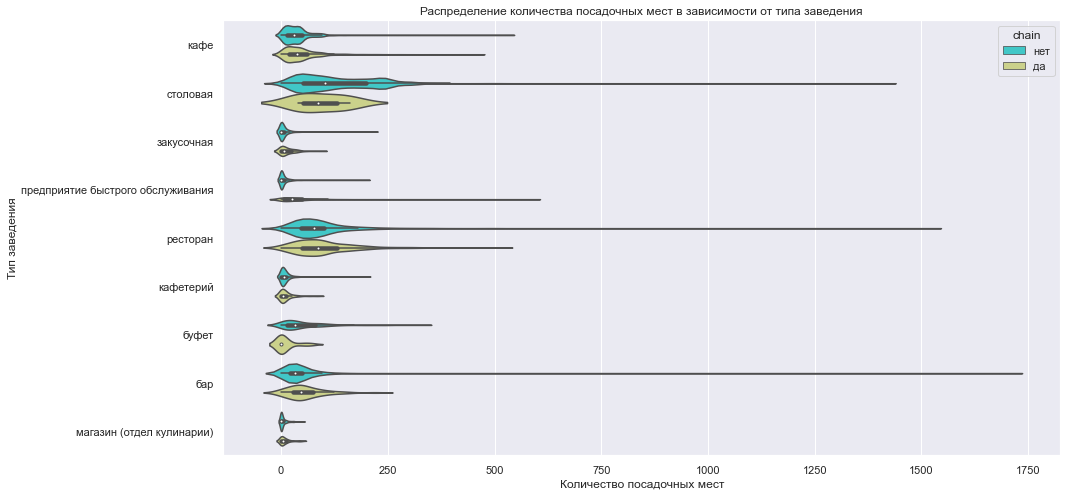

In [117]:
# распределение количества посадочных мест в зависимости от типа заведения
sns.set(rc={'figure.figsize':(15,8)}) # размер диаграммы
sns.violinplot(x='number', y='object_type', data=rest_data, palette='rainbow', hue='chain') # диаграмма распределения числа мест
plt.xlabel('Количество посадочных мест') # подпись оси х
plt.ylabel('Тип заведения') # подпись оси у
plt.title('Распределение количества посадочных мест в зависимости от типа заведения') # название диаграммы

Также стоит отметить, что количество посадочных мест в несетевых столовых, ресторанах и барах сильно разбросанно. Распределение количества посадочных мест в этих типах заведениях, как видно на диаграмме выше, имеет длинный хвост справа. Это означает, что выбросы могли сильно повлиять на средние значения количества посадочных мест. Малый разброс количества посадочных мест наблюдается в категориях "закусочная", "кафетерий" и "магазин (отдел кулинарии)".

### Создание столбца с названием улицы, на которой находится заведение

In [118]:
# список с самыми распространенными типами улиц
street_types = ['улица', 'шоссе', 'проспект', 'набережная', 'переулок', 'проезд', 
                'площадь', 'бульвар', 'тупик', 'аллея', 'спуск', 'тракт', 'кольцо', 'линия']
# функция, которое находит часть адреса, в котором указана улица
def find_street_type(address):
    """Функция принимает строку с названием адреса заведения и возвращает часть адреса, которая содержит тип и название улицы"""
    for adr_part in address.split(", "): # каждая строка адреса разбивается на части адреса по ", "
        for street in street_types: # в адресе ищется тип улицы
            if adr_part.find(street) != -1: # когда тип улицы найден
                return adr_part # возвращается часть адреса, содержащая тип и название улицы
rest_data['streetname'] = rest_data['address'].apply(find_street_type) # применение функции find_street_type к столбцу 'address'
#not_typical_streetname = rest_data.query('streetname.isnull()').to_list() # адреса, в которых улица не указано явно
# print('\033[1m' + 'Количество адресов, в которых улица не указана явно:' + '\033[0m')
# print(len(not_typical_streetname))
# print('\033[1m' + 'Процент адресов, в которых улица не указана явно:' + '\033[0m')
# print(round(len(not_typical_streetname)/len(rest_data) * 100, 2), ' %')
# print('\033[1m' + 'Список адресов, в которых улица не указана явно:' + '\033[0m')
#not_typical_streetname
print('\033[1m' + 'Количество адресов, в которых улица не указана явно:' + '\033[0m')
print(rest_data['streetname'].isna().sum())
print('\033[1m' + 'Процент адресов, в которых улица не указана явно:' + '\033[0m')
print(round(rest_data['streetname'].isna().sum()/len(rest_data) * 100, 2), ' %')

Количество адресов, в которых улица не указана явно:
391
Процент адресов, в которых улица не указана явно:
2.58  %


В данных присутствует 1.31% адресов, в которых улица не указана явно. Так как подобных адресов немного (менее 5%), то их можно удалить.

In [119]:
rest_data.dropna(subset=['streetname']) # удаление строк, в которых с столбце 'streetname' стоит None

,id,object_name,chain,object_type,address,number,streetname
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,24309,академия,да,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,119365,вишневая метель,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица
...,...,...,...,...,...,...,...
15359,222077,шоколадница,да,кафе,"город москва, кантемировская улица, дом 47",72,кантемировская улица
15360,219759,шоколадница,да,кафе,"город москва, улица вавилова, дом 3",36,улица вавилова
15361,208537,шоколадница,да,кафе,"город москва, 3-й крутицкий переулок, дом 18",50,3-й крутицкий переулок
15362,209264,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",10,улица земляной вал


В датафрейме был создан столбец 'streetname', в котором содержится информация об улице, на которой находится кафе. В 2.58% строк информация об улице не была указана явно (то есть в адресе не содержалось распространенных названий типов улиц, таких как "улица", "переулок", "площадь" и так далее). Так как таких адресов было немного, то такие строки были удалены из датафрейма.

### Топ-10 улиц по количеству объектов общественного питания

In [120]:
spreadsheet_id = '1aBr0H62DX7C3769DwIn-uNqs9nHSBUtGEcR9PXGmffQ' # файл с информацией о том, какие улицы принадлежат какому району
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)

r = requests.get(file_name)
moscow_streets = pd.read_csv(BytesIO(r.content)) # чтение датафрейма с данными о распределении улиц по районам Москвы
moscow_streets

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [121]:
# приведение столбцов 'streetname', 'okrug' и 'area' к нижнему регистру
moscow_streets['streetname'] = moscow_streets['streetname'].str.lower()
moscow_streets['okrug'] = moscow_streets['okrug'].str.lower()
moscow_streets['area'] = moscow_streets['area'].str.lower()
moscow_streets.head(10)

,streetname,areaid,okrug,area
0,выставочный переулок,17,цао,пресненский район
1,улица гашека,17,цао,пресненский район
2,большая никитская улица,17,цао,пресненский район
3,глубокий переулок,17,цао,пресненский район
4,большой гнездниковский переулок,17,цао,пресненский район
5,малый гнездниковский переулок,17,цао,пресненский район
6,большая грузинская улица,17,цао,пресненский район
7,малая грузинская улица,17,цао,пресненский район
8,грузинская площадь,17,цао,пресненский район
9,улица грузинский вал,17,цао,пресненский район


In [122]:
# объединение исходного датафрейма с датафреймом с информацией о распределении улиц по районам Москвы
# объединение датафреймов происходит по названию улицы
rest_data = rest_data.merge(moscow_streets, on='streetname', how='left')
rest_data.head(10)

,id,object_name,chain,object_type,address,number,streetname,areaid,okrug,area
0,151635,сметана,нет,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова,86.0,свао,ярославский район
1,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина,18.0,цао,таганский район
2,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина,117.0,ювао,нижегородский район
3,77874,родник,нет,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина,133.0,юзао,район южное бутово
4,24309,академия,да,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица,18.0,цао,таганский район
5,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица,75.0,свао,район лианозово
6,119365,вишневая метель,нет,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица,75.0,свао,район лианозово
7,27429,стол. при гоу сош № 1051,нет,столовая,"город москва, абрамцевская улица, дом 15, корп...",240,абрамцевская улица,75.0,свао,район лианозово
8,148815,брусника,да,кафе,"город москва, переулок сивцев вражек, дом 6/2",10,переулок сивцев вражек,12.0,цао,район арбат
9,148815,брусника,да,кафе,"город москва, переулок сивцев вражек, дом 6/2",10,переулок сивцев вражек,20.0,цао,район хамовники


In [123]:
# таблица с информацией о количестве заведений общественного питания 
# в зависимости от улица и района
objects_streets = rest_data.groupby(['streetname', 'area'])['id']\
                           .agg('nunique')\
                           .sort_values(ascending=False)\
                           .reset_index()\
                           .rename(columns={'id':'quantity'})
objects_streets.head(50)

,streetname,area,quantity
0,проспект мира,район ростокино,196
1,проспект мира,район марьина роща,196
2,проспект мира,алексеевский район,196
3,проспект мира,ярославский район,196
4,проспект мира,мещанский район,196
5,проспект мира,район свиблово,196
6,проспект мира,останкинский район,196
7,профсоюзная улица,район ясенево,181
8,профсоюзная улица,обручевский район,181
9,профсоюзная улица,район черемушки,181


In [124]:
print('\033[1m' + 'Топ-10 улиц по количеству объектов общественного питания' + '\033[0m')
top_10 = objects_streets['streetname'].unique()[0:10] 
for i in top_10:
    print(i)

Топ-10 улиц по количеству объектов общественного питания
проспект мира
профсоюзная улица
ленинградский проспект
пресненская набережная
варшавское шоссе
ленинский проспект
проспект вернадского
кутузовский проспект
каширское шоссе
кировоградская улица


In [125]:
# таблица, в которой для топ-10 улиц по количество объектов общественного питания, соответствует количество объектов
# общественного питания на них
top_10_objects = objects_streets.query('streetname in @top_10')[['streetname', 'quantity']].drop_duplicates().reset_index()
top_10_objects

,index,streetname,quantity
0,0,проспект мира,196
1,7,профсоюзная улица,181
2,13,ленинградский проспект,172
3,17,пресненская набережная,165
4,18,варшавское шоссе,163
5,26,ленинский проспект,148
6,34,проспект вернадского,126
7,39,кутузовский проспект,114
8,41,каширское шоссе,110
9,45,кировоградская улица,107


In [126]:
print('\033[1m' + 'Количество районов, в которых находятся топ-10 улиц по количеству объектов общественного питания' + '\033[0m')
objects_streets.query('streetname in @top_10').groupby('streetname')['area']\
                .agg('nunique')\
                .reset_index()\
                .sort_values(by='area',ascending=False)\
                .rename(columns={'streetname':'Название улицы', 'area':'Количество районов'})

Количество районов, в которых находятся топ-10 улиц по количеству объектов общественного питания


,Название улицы,Количество районов
0,варшавское шоссе,8
5,ленинский проспект,8
8,проспект мира,7
9,профсоюзная улица,6
7,проспект вернадского,5
1,каширское шоссе,4
4,ленинградский проспект,4
2,кировоградская улица,3
3,кутузовский проспект,2
6,пресненская набережная,1


Text(0.5, 1.0, 'Топ-10 улиц по количеству объектов общественного питания')

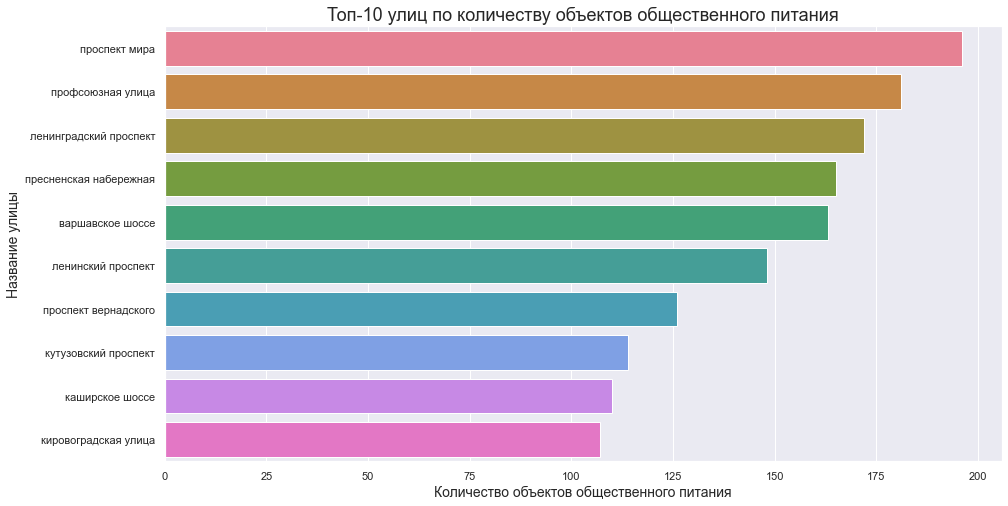

In [127]:
# линейчатая диаграмма, показывающая количество объектов общественного питания на топ-10 улицах
sns.barplot(x=top_10_objects['quantity'], y=top_10_objects['streetname'], palette='husl')
plt.xlabel('Количество объектов общественного питания', fontsize=14)
plt.ylabel('Название улицы', fontsize=14)
plt.title('Топ-10 улиц по количеству объектов общественного питания', fontsize=18)

В топ-10 улиц по количеству объектов общественного питания входят проспект Мира (196 заведение), Профсоюзная улица (181 заведение), Ленинградский проспект (172 заведения), Пресненская набережная (165 заведений), Варшавское шоссе (163 заведения), Ленинский проспект (148 заведений), проспект Вернадского (126 заведений), Кутузовский проспект (114 заведений) и Каширское шоссе (110 заведений). Большинство из этих улиц (за исключением Пресненской набережной) расположены в нескольких районах Москвы, соответственное эти улицы являются одними из наиболее протяженных улиц города:
   - Проспект Мира: Мещанский район, Алексеевский район, Останкинсий район, район Марьина роща, район Ростокино, район Свиблово и Ярославский район
   - Профсоюзная улица: Академический район, Обручевский район, район Коньково, район Теплый Стан, район Черемушки и район Ясенево
   - Ленинградский проспект: Хорошевский район, район Аэропорт, район Беговой и район Сокол
   - Пресненская набережная: Пресненский район
   - Варшавское шоссе: район Северное Бутово, район Нагатино-Садовники, район Северное Чертаново, Донской район, район Чертаново Центральное, район Чертаново Южное и район Южное Бутово
   - Ленинский проспект: район Якиманка, Донской район, район Проспект Вернадского, район Теплый Стан, район Тропарево-Никулино, Обручевский район, Ломоносовский район и район Гагаринский
   - Проспект Вернадского: район Проспект Вернадского, Ломоносовский район, район Гагаринский, район Тропарево-Никулино, район Фили-Давыдково и район Дорогомилово
   - Кутузовский проспект: район Фили-Давыдково и район Дорогомилово
   - Каширское шоссе: район Москворечье-Сабурово, район Нагатино-Садовники, район Орехово-Борисового Северное и район Орехово-Борисово Южное.
   - Кировоградская улица: район Чертаново Южновое, район Чертаново Центральное и район Чертаново Северное.

### Число улиц с одним объектом питания

In [128]:
# датафрейм, в котором для каждой улицы с одним объектом общественного питания указан округ и район 
single_object = rest_data.groupby(['area', 'streetname'])['id']\
         .agg('nunique')\
         .reset_index()\
         .query('id == 1')
single_object.head(10)

,area,streetname,id
13,алексеевский район,1-й рижский переулок,1
17,алексеевский район,зубарев переулок,1
18,алексеевский район,кулаков переулок,1
19,алексеевский район,кучин переулок,1
23,алексеевский район,рижский проезд,1
24,алексеевский район,староалексеевская улица,1
28,алексеевский район,улица константинова,1
37,алтуфьевский район,стандартная улица,1
43,бабушкинский район,олонецкий проезд,1
45,бабушкинский район,печорская улица,1


In [129]:
# список улиц, на которых находится один объект общественного питания
print('\033[1m' + 'Улицы с одним объектом общественного питания' + '\033[0m')
for i in single_object['streetname'].unique():
    print(i)

Улицы с одним объектом общественного питания
1-й рижский переулок
зубарев переулок
кулаков переулок
кучин переулок
рижский проезд
староалексеевская улица
улица константинова
стандартная улица
олонецкий проезд
печорская улица
улица рудневой
чукотский проезд
1-й басманный переулок
архангельский переулок
большой казённый переулок
большой полуярославский переулок
большой трёхсвятительский переулок
гольяновская улица
госпитальный переулок
елоховский проезд
кондрашёвский тупик
лефортовский переулок
малый златоустинский переулок
малый ивановский переулок
малый казённый переулок
мрузовский переулок
петроверигский переулок
плетешковский переулок
подсосенский переулок
посланников переулок
рубцов переулок
сверчков переулок
спартаковский переулок
улица жуковского
улица новая дорога
хитровский переулок
хохловский переулок
бескудниковский переулок
бескудниковский проезд
улица гончарова
улица фонвизина
2-й новоподмосковный переулок
нарвская улица
3-й лихачёвский переулок
конаковский проезд
пулковская

In [130]:
print('\033[1m' + 'Общее число улиц' + '\033[0m')
print(len(rest_data['streetname'].unique()))
print('\033[1m' + 'Число улиц с одним объектом питания' + '\033[0m')
print(len(single_object['streetname'].unique()))
print('\033[1m' + 'От общего количество улиц улицы с одним объектом питания составляют ' + '\033[0m')
print(round(len(single_object['streetname'].unique())/len(rest_data['streetname'].unique()) * 100, 1), ' %')

Общее число улиц
1901
Число улиц с одним объектом питания
516
От общего количество улиц улицы с одним объектом питания составляют 
27.1  %


In [131]:
# список районов, в которых расположены улицы с одним заведением общественного питания
print('\033[1m' + 'Количество районов, в которых находятся улицы с одним объектом общественного питания' + '\033[0m')
print(len(single_object['area'].unique()))
print('\033[1m' + 'Процент районов, в которых находятся улицы с одним объектом общественного питания' + '\033[0m')
print(round(len(single_object['area'].unique())/len(rest_data['area'].unique()) * 100, 1), ' %')
print('\033[1m' + 'Названия районов, в которых находятся улицы с одним объектом общественного питания' + '\033[0m')
for i in single_object['area'].unique():
    print(i)

Количество районов, в которых находятся улицы с одним объектом общественного питания
101
Процент районов, в которых находятся улицы с одним объектом общественного питания
81.5  %
Названия районов, в которых находятся улицы с одним объектом общественного питания
алексеевский район
алтуфьевский район
бабушкинский район
басманный район
бескудниковский район
бутырский район
войковский район
головинский район
даниловский район
дмитровский район
донской район
красносельский район
лосиноостровский район
мещанский район
можайский район
молжаниновский район
нагорный район
нижегородский район
обручевский район
останкинский район
панфиловский район
пресненский район
район арбат
район аэропорт
район беговой
район бирюлево восточное
район богородское
район внуково
район восточное измайлово
район восточный
район выхино-жулебино
район гагаринский
район гольяново
район дорогомилово
район замоскворечье
район западное дегунино
район зюзино
район ивановское
район измайлово
район коньково
район коптево
ра

На 516 улицах (что составляет 27.1% от всех улиц Москвы) расположено по одному объекту общественного питания. Данные улицы расположены в 101 районе Москвы, что составляет 81.5% от всех районов города. Также, многие улицы с одним объектом общественного питания расположены на окраине Москвы.

### Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

In [132]:
# количество посадачных мест в заведениях, входящих в топ-10 улиц по количеству объектов общественного питания
many_objects = rest_data.query('streetname in @top_10')[['streetname', 'number']]
many_objects.head()

,streetname,number
243,варшавское шоссе,150
244,варшавское шоссе,150
245,варшавское шоссе,150
246,варшавское шоссе,150
247,варшавское шоссе,150


Text(0.5, 1.0, 'Распределение количества посадочных мест для\n топ-10 улиц по количеству объектов общественного питания')

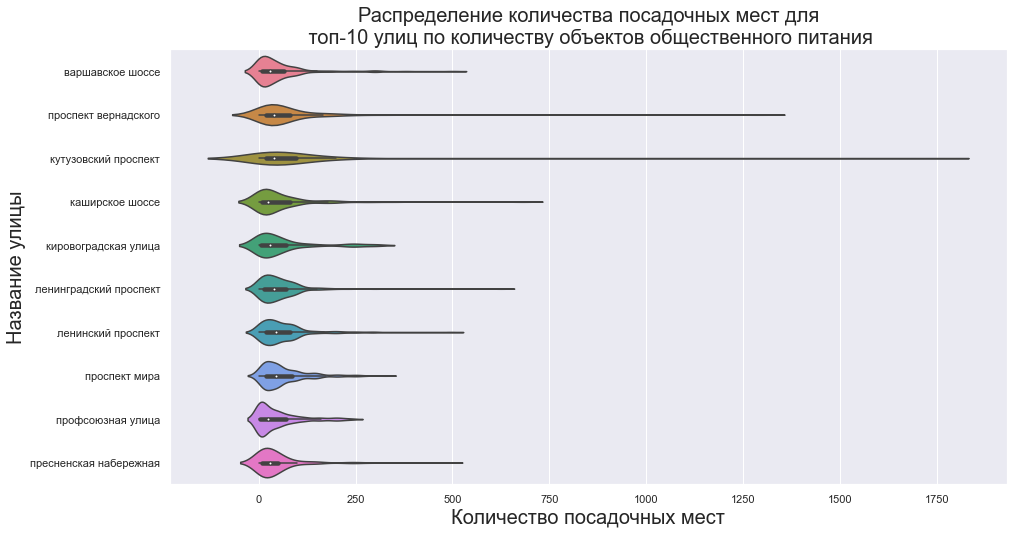

In [133]:
# построение диаграммы распределения количества посадочных мест для улиц с большим количеством объектов общественного питания
sns.violinplot(x='number', y='streetname', data=many_objects, palette='husl')
plt.xlabel('Количество посадочных мест', fontsize=20)
plt.ylabel('Название улицы', fontsize=20)
plt.title('Распределение количества посадочных мест для\n топ-10 улиц по количеству объектов общественного питания', fontsize=20)

Судя по диаграмме распределения количества посадочных мест для улиц, входящих в топ-10 по количеству объектов общественного питания, можно сказать, что большинство объектов общественного питания имеют менее 250 посадочных мест. Пик распределния количества посадочных мест приходится приблизительно на 50 мест. Наибольший разброс количества посадочных мест виден на Кутузовском проспекте (есть заведения в более чем 1750 посадочных мест), проспекте Вернадского (есть заведения с более чем 1250 посадочными местами) и Каширском шоссе (есть заведения с почти 750 заведениями). Наименьший разброс количества посадочных мест наблюдается на Профсоюзной улице.

# 3 Финальные выводы

На основании анализа полученных данных о заведениях общественного питания в Москве можно сделать следующие выводы:

   - Больше всего среди заведений общественного питания кафе (39.6%), столовых (17.0%) и рестораны (15.0%). Реже всего встречаются кафетерии (2.6%), закусочные (2.3%) и рестораны (1.8%).

   - 79% заведений являются несетевыми, 21% заведений - сетевыми.

   - Сетевое распространение наиболее характерно для кафе, предприятий быстрого обслуживания и ресторанов. Заведения этих типов составляют в общей сумме 91% от всех сетевых заведений.
   
   - Наибольший процент сетевых заведений отмечается в категории "предприятие быстрого обслуживания" (42% предприятий быстрого обслуживания являются сетевыми) и "магазин(отдел кулинарии)" (29%). Третье место по сетевых заведений делят между собой рестораны и кафе (примерно по 25% заведений в этих категориях яляются сетевыми). Наименее редко сетевыми являются столовые: менее 0.2% столовых являются сетевыми.

   - Для сетевых заведений характерно небольшое число филиалов (медианное значение числа филиалов равно 6, 95-й перцентиль равен 60) и большое количество посадочных мест (медианное значение числа посадочных мест равно 40, 95-й перцентиль равен 153).

   - Судя по среднему арифметическому и медиане, наибольшее количество посадочных мест находится в столовых (среднее арифметическое равно 130, медиана равна 103) и ресторанах (среднее арифметическое равно 97, медиана - 80). Наименьшее число посадочных мест располагается в кафетериях, закусочных и ресторанах (средние арифметические - 9, 7 и 5, соответственно, медианы - 6, 0 и 0, соответсвенно).

   - Топ-10 улиц по количеству объектов общественного питания (в порядке убывания количества объектов): Проспект Мира (196 объектов общественного питания), Профсоюзная улица (181 объект), Ленинградский проспект (172 объекта), Пресненская набережная (165 объектов), Варшавское шоссе (163 объекта), Ленинский проспект (148 объектов), проспект Вернадского (126 объектов), Кутузовский проспект (114 объектов), Каширское шоссе (110 объектов) и Кировоградская улица (107 объектов). Все эти улицы за исключением Пресненской набережной расположены в нескольких районах, что говорит о том, что большое количество заведений общественного питания на этих улицах объясняется скорее всего размером этих улиц.

   - На 516 улицах (27.1% всех улиц Москвы) находится по одному объекту общественного питания. Эти улицы принадлежат 101 району Москвы, что составляет 81.5% от всех районов города. В основном улицы с одним объектом общественного питания расположены на окраинах Москвы.

   - Улицами с большим количеством посадочных мест считаются улицы, входяшие в список топ-10 улиц по количеству объектов общественного питания. Наибольший разброс количества посадочных мест наблюдается на Кутузовском проспекте, проспекте Вернадского и Каширском шоссе, наименьший - на Профсоюзной улице.

**Рекомендации о виде заведения, количестве посадочных мест и районе расположения**

Самым популярным видом заведения общественного питания является кафе, также столовые и рестораны входят в тройку лидеров по популярности. Выбор типа заведения зависит от того, сколько денег готовы вложить инвесторы: столовая является более дешевым вариантом, рестораны - более дорогим. Также выбор типа заведения зависит от того, на какую категорию клиентов будет ориентировано заведение. Например, если заведение будет ориентировано на студентов, то стоит выбрать вариант столовой.

Количество посадочных в большинстве заведений не превышает 153, медианное число количества посадочных мест равно 40. Количество посадочных мест также зависит от типа заведения, которые будет выбран, например, для столовых характерно наибольшее количество посадочных мест (медианное количество посадочных мест в столовых равно 103), а в закусочных и отделах кулинарии магазинах медианное число посадочных мест равно нулю.

Более четверти улиц Москвы имеют по одному заведению общественного питания. Большая часть подобных улиц находятся на окраинах Москвы, следовательно, будут иметь небольшую проходимость и большей частью клиентов будут являться жители близлежащих домов. С другой стороны, заведения на улицах с одним объектом общественного питания, будут иметь невысокую конкуренцию, а также стоимость арендной платы за помещение будет ниже в силу того, что помещение будет скорее всего находится в районе на окраине. Конкуренция в районах с большим количеством заведений общественного питания будет больше, однако будет больше и проходимость. Также, в районах с большим количеством объектов питания будет выше стоимость арендной платы. При выборе района, в котором будет расположено кафе, важно понимать, сколько денег инвесторы готовы отдать за арендную плату.

При выборе района, в котором будет расположено заведение, также следует брать в расчет категорию клентов, на которую будет ориентировано кафе. Например, если это будет столовая, ориентированная на студентов, то стоит выбрать район поблизости с колледжем или университетом, или если это будет кафе, то стоит ориентироваться на расположение офисов, чтобы работники, например, могли есть бизнес-ланчи, которые им будут подавать роботы.

Таким образом, наиболее распространенным видом заведения является кафе; наиболее популярной локацией - наиболее протяженные улицы Москвы (Проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект, проспект Вернадского, Кутузовский проспект, Каширское шоссе и Кировоградская улица); наименее популярной - улицы в районах на окраине; большинство заведений имеют около 40 посадочных мест, но редко более 153. Для более точных рекомендаций о виде заведения, количестве посадочных мест и районе расположения необходимо провести дополнительную консультацию с инвесторами, чтобы понять, сколько денег они готовы выделить на арендную плату, закупку кухонного оборудование и так далее. Чтобы определиться с типом заведения, необходимо понять, на какую аудиторию заведение будет направлено. Для того, чтобы понять, в каком районе будет расположено заведение, стоит также сперва определиться с аудиторией и суммой денег, которую инвесторы готовы предоставить на оплату аренды.